# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to conf
#irm sufficient count
len(cities)

606

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i = 1
lat = []
lon = []
temp_max = []
humidity = []
description = []
speed  = []
country = []
dt = []
place = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        description.append(response["clouds"]["all"])
        speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        place.append(city)
        
        print(f"Process Record {i} of Set 1 | {city}")
        i +=1
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
        pass

Process Record 1 of Set 1 | sinjar
Process Record 2 of Set 1 | mataura
Process Record 3 of Set 1 | anadyr
Process Record 4 of Set 1 | atambua
Process Record 5 of Set 1 | sterling
Process Record 6 of Set 1 | kamaishi
Process Record 7 of Set 1 | cherskiy
Process Record 8 of Set 1 | taoudenni
Process Record 9 of Set 1 | vieques
Process Record 10 of Set 1 | zabaykalsk
Process Record 11 of Set 1 | jamestown
Process Record 12 of Set 1 | cape town
Process Record 13 of Set 1 | codrington
Process Record 14 of Set 1 | punta arenas
Process Record 15 of Set 1 | rocha
City not found. Skipping...
Process Record 16 of Set 1 | bluff
Process Record 17 of Set 1 | san cristobal
Process Record 18 of Set 1 | hermanus
Process Record 19 of Set 1 | muzhi
Process Record 20 of Set 1 | atuona
Process Record 21 of Set 1 | nokaneng
Process Record 22 of Set 1 | logan
Process Record 23 of Set 1 | shelburne
Process Record 24 of Set 1 | khatanga
Process Record 25 of Set 1 | poya
Process Record 26 of Set 1 | bira
Proce

City not found. Skipping...
Process Record 201 of Set 1 | yanam
Process Record 202 of Set 1 | rabak
Process Record 203 of Set 1 | bondo
Process Record 204 of Set 1 | waingapu
Process Record 205 of Set 1 | solnechnyy
Process Record 206 of Set 1 | ulaangom
Process Record 207 of Set 1 | esperance
Process Record 208 of Set 1 | lebu
Process Record 209 of Set 1 | vuktyl
Process Record 210 of Set 1 | comodoro rivadavia
Process Record 211 of Set 1 | altay
Process Record 212 of Set 1 | hasaki
Process Record 213 of Set 1 | washington
City not found. Skipping...
Process Record 214 of Set 1 | sistranda
Process Record 215 of Set 1 | cruz grande
Process Record 216 of Set 1 | san blas
Process Record 217 of Set 1 | asfi
Process Record 218 of Set 1 | bethel
Process Record 219 of Set 1 | bahia blanca
Process Record 220 of Set 1 | abha
Process Record 221 of Set 1 | iqaluit
Process Record 222 of Set 1 | aasiaat
Process Record 223 of Set 1 | mitsamiouli
Process Record 224 of Set 1 | alice springs
Process R

Process Record 398 of Set 1 | male
Process Record 399 of Set 1 | ihosy
Process Record 400 of Set 1 | lasa
Process Record 401 of Set 1 | manicore
Process Record 402 of Set 1 | severo-kurilsk
Process Record 403 of Set 1 | monterey
Process Record 404 of Set 1 | bela
Process Record 405 of Set 1 | noshiro
City not found. Skipping...
Process Record 406 of Set 1 | lafiagi
Process Record 407 of Set 1 | chapais
Process Record 408 of Set 1 | suhl
Process Record 409 of Set 1 | kieta
Process Record 410 of Set 1 | kaoma
Process Record 411 of Set 1 | san ramon
Process Record 412 of Set 1 | mayakonda
Process Record 413 of Set 1 | powell river
Process Record 414 of Set 1 | barcelos
Process Record 415 of Set 1 | kavaratti
Process Record 416 of Set 1 | saint-francois
Process Record 417 of Set 1 | tsumeb
Process Record 418 of Set 1 | kawalu
Process Record 419 of Set 1 | salekhard
Process Record 420 of Set 1 | boca do acre
Process Record 421 of Set 1 | saint-pierre
Process Record 422 of Set 1 | redlands
P

In [5]:
### Convert Raw Data to DataFrame
#* Export the city data into a .csv.
#* Display the DataFrame

In [32]:
weather_dict = {
    "City": place,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": description,
    "Wind Speed": speed,
    "Country": country,
    "Date": dt
}

In [33]:
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)
weather_data.head()
print(len(weather_data))

555


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
#  Get the indices of cities that have humidity over 100%.
over_hundred = weather_data.loc[weather_data["Humidity"]>100]
hundred = weather_data.loc[weather_data["Humidity"]>99]
under = weather_data.loc[weather_data["Humidity"]<100]
#over_ix = weather_data.ix["Humidity"]
print(len(hundred))
print(len(over_hundred))
print(len(under))
print(len(weather_data))
#over_ix.head()

13
0
542
555


In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [36]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

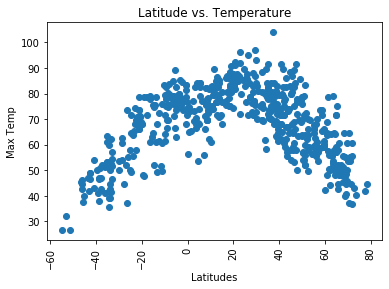

In [37]:
#plt.bar(weather_data["Lat"], weather_data["Max Temp"])
#plt.xlabel("Latitudes")
#plt.ylabel("Max Temp")
#plt.xticks(rotation=90);
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])
plt.xlabel("Latitudes")
plt.ylabel("Max Temp")
plt.xticks(rotation=90)
plt.title("Latitude vs. Temperature")
plt.show()

## Latitude vs. Humidity Plot

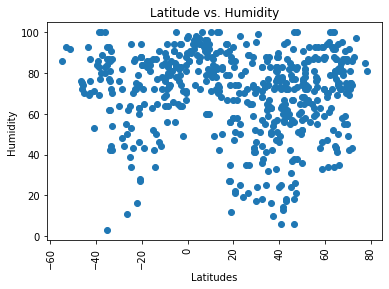

In [38]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.xlabel("Latitudes")
plt.ylabel("Humidity")
plt.xticks(rotation=90)
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

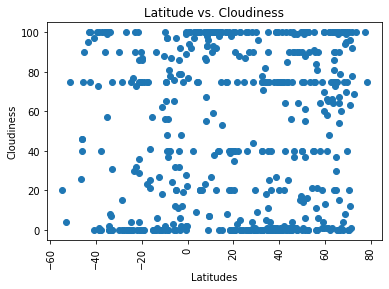

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness")
plt.xticks(rotation=90)
plt.title("Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

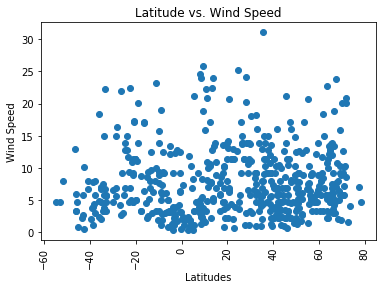

In [40]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed")
plt.xticks(rotation=90)
plt.title("Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots

In [42]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[weather_data["Lat"]>=0]
southern = weather_data.loc[weather_data["Lat"]<=0]
northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinjar,36.32,41.88,84.09,16,0,6.29,IQ,1594862715
2,anadyr,64.75,177.48,59.00,77,20,13.42,RU,1594862715
4,sterling,39.01,-77.43,82.99,51,75,9.17,US,1594862715
5,kamaishi,39.27,141.88,64.40,88,75,2.24,JP,1594862716
6,cherskiy,68.75,161.30,47.80,59,94,5.06,RU,1594862716
...,...,...,...,...,...,...,...,...,...
547,aswan,24.09,32.91,85.48,19,0,12.57,EG,1594862777
548,phan thiet,10.93,108.10,81.39,80,59,4.81,VN,1594862777
550,moussoro,13.64,16.49,85.28,42,98,5.26,TD,1594862778
551,lashio,22.93,97.75,72.16,98,100,0.60,MM,1594862778


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

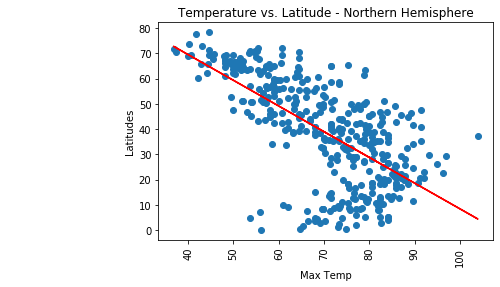

In [43]:
x_values = northern["Max Temp"]
y_values = northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Temperature vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

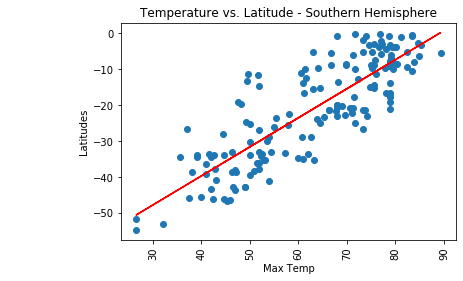

In [44]:
x_values = southern["Max Temp"]
y_values = southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Temperature vs. Latitude - Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

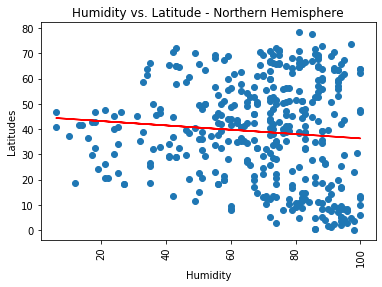

In [45]:
x_values = northern["Humidity"]
y_values = northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,74),fontsize=15,color="red")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Humidity vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

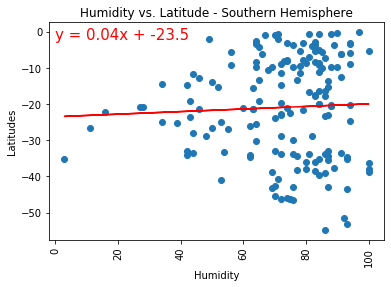

In [46]:
x_values = southern["Humidity"]
y_values = southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-2),fontsize=15,color="red")
plt.xlabel("Humidity")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Humidity vs. Latitude - Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

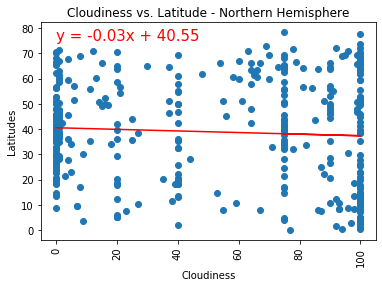

In [47]:
x_values = northern["Cloudiness"]
y_values = northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,75),fontsize=15,color="red")
plt.xlabel("Cloudiness")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Cloudiness vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

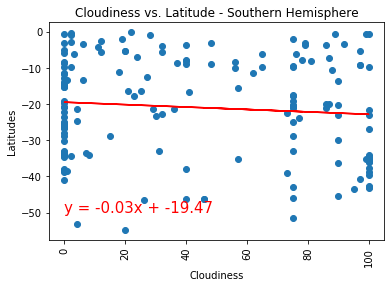

In [48]:
x_values = southern["Cloudiness"]
y_values = southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
plt.xlabel("Cloudiness")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Cloudiness vs. Latitude - Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

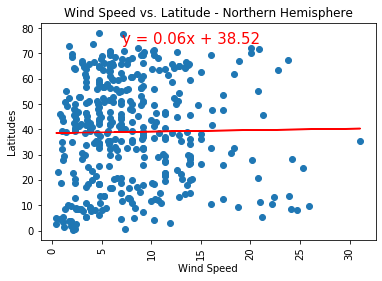

In [49]:
x_values = northern["Wind Speed"]
y_values = northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,74),fontsize=15,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Wind Speed vs. Latitude - Northern Hemisphere")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

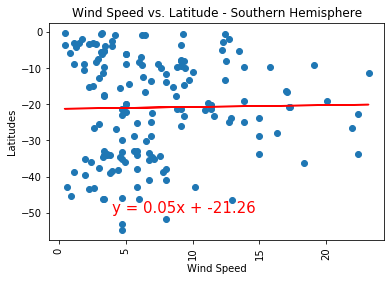

In [31]:
x_values = southern["Wind Speed"]
y_values = southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-50),fontsize=15,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Latitudes")
plt.xticks(rotation=90)
plt.title("Wind Speed vs. Latitude - Southern Hemisphere")
plt.show()